# N-gram Application in Sentiment Analysis: An Exploration with the IMDb Dataset


## Sentiment Analysis

Sentiment analysis has emerged as a powerful tool for businesses looking to understand consumer opinions and improve their decision-making processes. By leveraging natural language processing (NLP) and machine learning algorithms, companies can analyze vast amounts of textual data from sources such as social media, customer reviews, and surveys. This analysis allows businesses to gauge public sentiment towards their products or services, identify trends, and respond proactively to customer feedback. As a result, they can enhance customer satisfaction, tailor their marketing strategies, and ultimately drive sales growth. The ability to quantify emotions and attitudes can also provide deeper insights into brand perception, enabling businesses to build stronger relationships with their target audience.

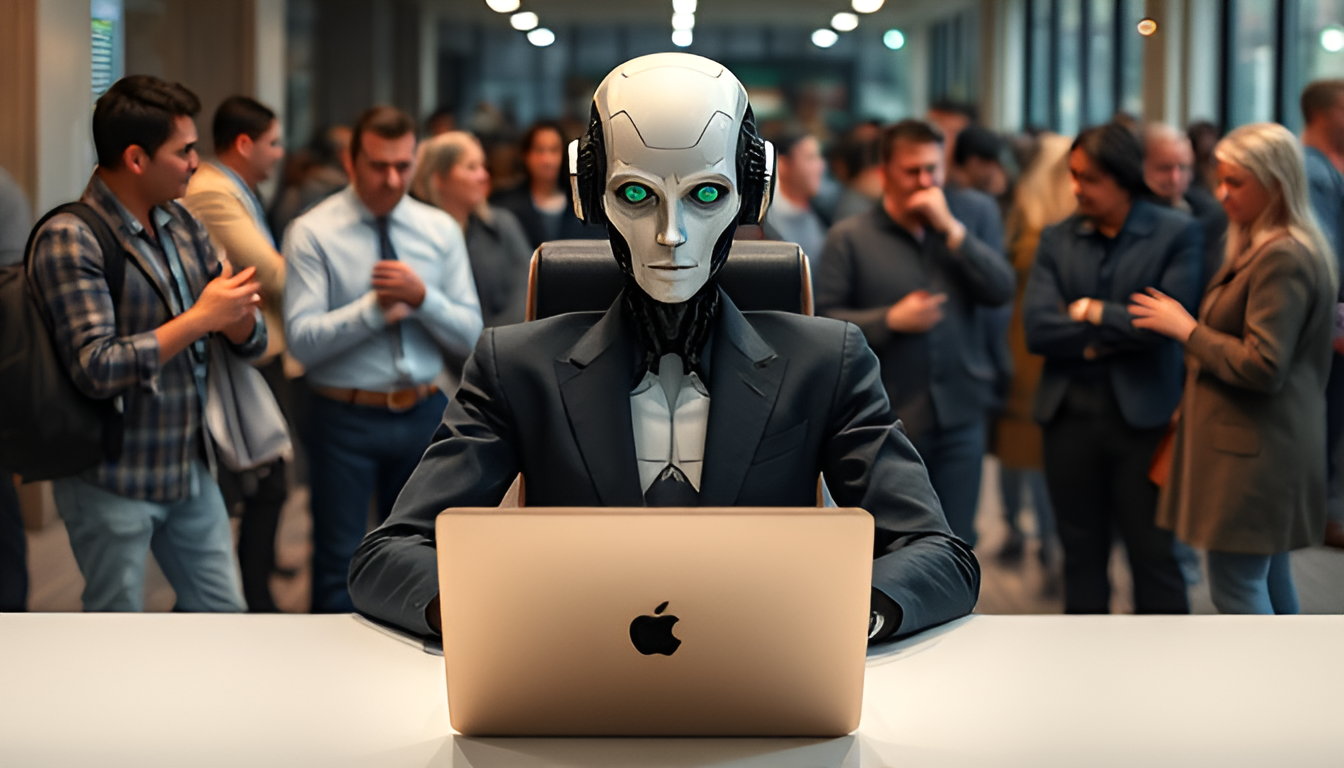

## IMDb reviews dataset

IMDB serves as an exemplary case study for showcasing the power of programming in sentiment analysis. The platform, which hosts millions of user-generated reviews and ratings for films, allows developers to implement sophisticated algorithms that can automatically assess the sentiment of these reviews. Through sentiment analysis, they can extract valuable information, such as understanding audience reactions to specific scenes, performances, or plot twists. By analyzing patterns in reviews, filmmakers and studios can make informed decisions about marketing, casting, and production, tying their strategies to actual viewer sentiment. This demonstrates how programming can not only streamline the analysis process but also transform raw data into actionable insights that staunchly support creative and strategic endeavors in the competitive entertainment industry. Overall, the synergy between sentiment analysis and programming underscores its critical role in shaping successful business strategies across various sectors.

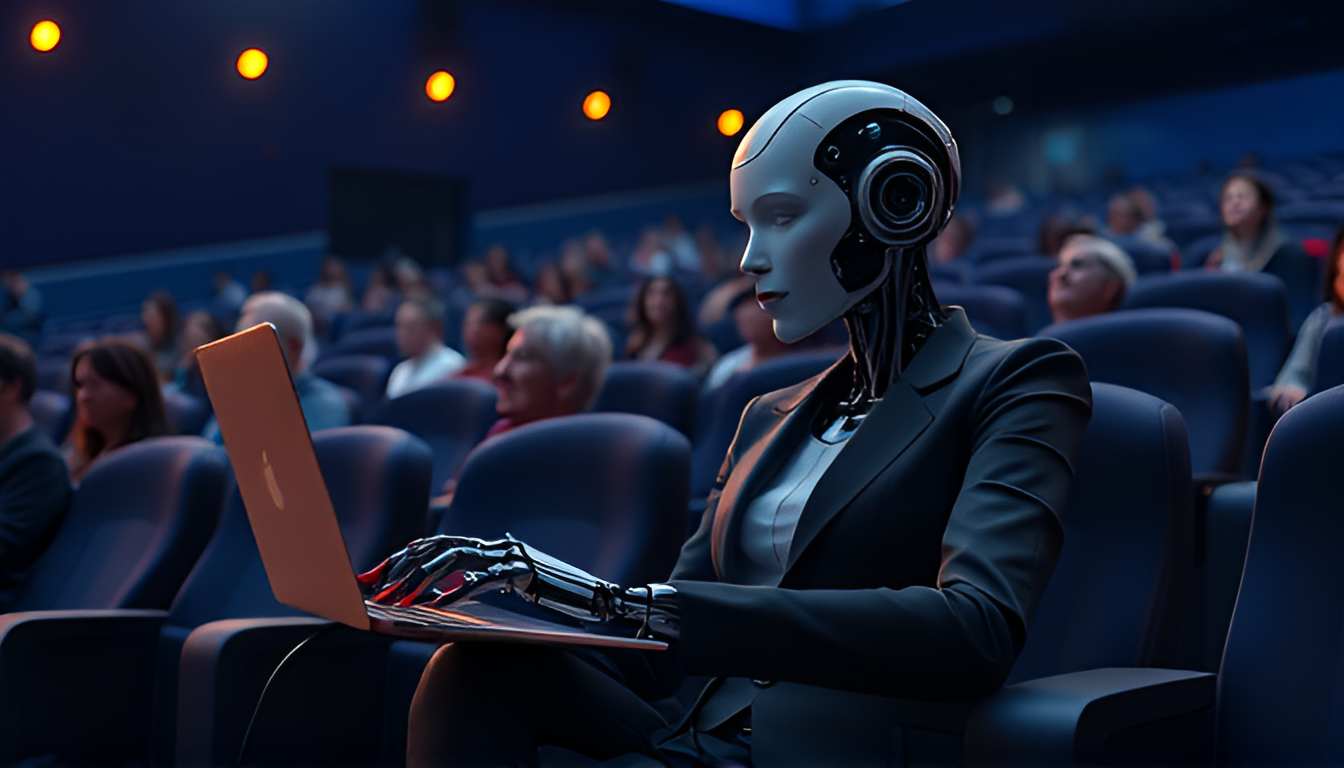

## Ngram
N-grams, which are contiguous sequences of 'n' items from a given sample of text, play a pivotal role in the field of natural language processing, particularly in sentiment analysis. By analyzing the occurrence of n-grams, analysts can derive insights about the sentiment expressed in texts, such as movie reviews. The n-gram approach allows us to capture not only individual words but also common phrases and word sequences that might carry significant sentiment indicators. For example, bigrams such as "great acting" or "poor storyline" can effectively highlight user sentiments that single words might miss, allowing for a more nuanced understanding of the sentiment expressed in the reviews.

## Introduction
This document outlines the process and findings of my programming project focused on sentiment analysis of IMDb movie reviews utilizing n-gram models. The primary objective was to analyze how various values of n in n-gram models affect classification performance in sentiment analysis tasks. After systematic experimentation, we discovered that an n value of 3 yielded the most favorable results compared to the other tested values.

## Importing Libraries
### The initial step involved importing all necessary libraries essential for data manipulation, model training, and evaluation.

Key libraries include:

Pandas: For data manipulation and analysis.

Scikit-learn: For machine learning functionalities.

NLTK: For natural language processing tasks, including tokenization.


In [1]:
# numpy, pandas
import numpy as np
import pandas as pd

# re, string, contractions
import re
import string
import contractions

#sklearn
from sklearn import metrics

# matplotlib
import matplotlib.pyplot as plt

#warning
import warnings
warnings.filterwarnings('ignore')

# nltk
import nltk
from nltk.lm import MLE
from nltk import FreqDist
from nltk.metrics import *
from nltk.lm import Laplace
from nltk.util import ngrams 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.lm.preprocessing import padded_everygram_pipeline, pad_both_ends
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/melikamolaei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/melikamolaei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melikamolaei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Reading the Dataset
The dataset consisted of labeled movie reviews sourced from IMDb. It was loaded using Pandas for easy manipulation.

In [2]:
X_train = pd.DataFrame(np.load('Data/x_train.npy' ,
                               allow_pickle = True))

X_val = pd.DataFrame(np.load('Data/x_val.npy' , 
                             allow_pickle = True))

X_test = pd.DataFrame(np.load('Data/x_test.npy' , 
                              allow_pickle = True))

In [3]:
y_train = pd.read_csv('Data/y_train.txt' , 
                      dtype = int, 
                      names = ['labels'])

y_val = pd.read_csv('Data/y_val.txt' ,
                    dtype = int,
                    names = ['labels'])

# Pre-processing
Data pre-processing steps involved cleaning the text data, such as converting to lowercase and removing special characters.

In [4]:
def convert_to_lowercase(col) :
    
    return col.apply(str.lower)

def remove_html(col) :
    
    def remove_tags(a) :
        html_pattern = re.compile('<.*?>')
        return html_pattern.sub(r'', a)
        
    return col.apply(remove_tags)

def remove_number(col) :
    
    def nreplace(a) :
        return re.sub(r'\d' , '' ,a)
        
    return col.apply(nreplace)

def fix_contractions(col) :
    
    def cont(a) :
        return contractions.fix(a)
        
    return col.apply(cont)

def remove_punc(col) :
    
    def no_punc(a) : 
        a = [i for i in a if i not in string.punctuation]
        return ''.join([i for i in a])
        
    return col.apply(no_punc)
    
def token(col) :
    
    return col.apply(word_tokenize)

def remove_sw(col) :
    
    sw = set(stopwords.words('english'))
    def no_sw(a) :     
        a = [ i for i in a if not i in sw ]
        return a
        
    return col.apply(no_sw)

def stem_list(col) :
    
    def stem_words(a) :
        b = []
        for i in a :
            ps = PorterStemmer()
            b.append(ps.stem(i))
        return b  
        
    return col.apply(stem_words)

def lemmatization_list(col) :
    
    def lemmatization_word(a) :
        
        b = []
        for i in a :
            wnl = WordNetLemmatizer()
            b.append(wnl.lemmatize(i))
            
        return b 
        
    return col.apply(lemmatization_word)

def final_preprocess(col ,
                     lemmatization = True ,
                     stemming = True ,
                     removing_punc = True ,
                     fixing_contractions = True , 
                     removing_number = True ,
                     removing_sw = True , 
                     tokenization = True , 
                     removing_html = True , 
                     converting_to_lowercase = True) :
   
    if converting_to_lowercase :
        col = convert_to_lowercase(col)
 
    if removing_html :
        col = remove_html(col)

    if removing_number :
        col = remove_number(col)
   
    if fixing_contractions :
        col = fix_contractions(col)
   
    if removing_punc :
        col = remove_punc(col)
   
    if tokenization :
        col = token(col)
   
    if removing_sw :
        col = remove_sw(col)
    
    if stemming :
        col = stem_list(col)
    
    if lemmatization :
        col = lemmatization_list(col)
    
    return col

In [5]:
pp_X_train = final_preprocess(X_train[0] , 
                              lemmatization = False , 
                              removing_sw = False)

pp_X_val = final_preprocess(X_val[0] , 
                            lemmatization = False , 
                            removing_sw = False)

pp_X_test = final_preprocess(X_test[0] ,
                             lemmatization = False , 
                             removing_sw = False)

#  Checking Zipf's Law
An exploratory analysis was conducted to examine the distribution of word frequencies, confirming alignments with Zipf's Law, which illustrates that a few words are extremely common while most words are rare.

In [6]:
def create_words_dict(col) :
    
    words_count = {}
    for i in col :    
        for j in i :
            
            if j in words_count :
                words_count[j] += 1
            else :
                words_count[j] = 1            
    
    words_count = pd.Series(words_count).sort_values(ascending = False)
    
    return words_count

In [7]:
 def plot_line_chart(words_count , Title , Xlabel , Ylabel) :
 
    plt.grid(color = 'gray' , 
             linestyle = '--' , 
             linewidth = 0.5) 
    
    plt.plot(words_count , 
             color = 'g' ,
             linewidth = '3')
    
    plt.title(Title)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)

In [8]:
words_count = create_words_dict(pp_X_train)

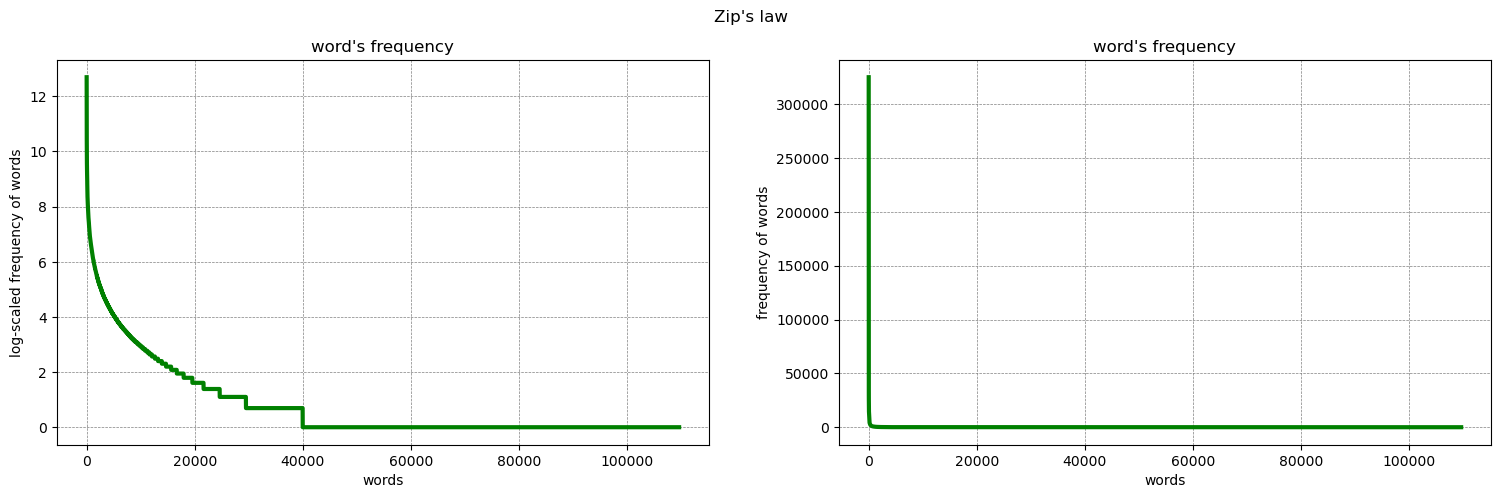

In [9]:
fig , ax = plt.subplots(1 , 2)
fig.set_size_inches(18.5 , 5)

plt.subplot(1 , 2 , 1)
plot_line_chart(np.log(np.array(words_count)) , 
                'word\'s frequency' ,
                'words' , 
                'log-scaled frequency of words')

plt.subplot(1 , 2 , 2)
plot_line_chart(np.array(words_count) , 
                'word\'s frequency' ,
                'words' ,
                'frequency of words')

plt.suptitle('Zip\'s law')
plt.show()

# N-gram Model Implementation
We implemented different n-gram models in the range of n=1 to n=4 and two positive and negetive classes.

In [10]:
def create_model(X_train , n) :
    
    paddedLine = [list(pad_both_ends(m , n)) for m in X_train]
    train , vocab = padded_everygram_pipeline(n , X_train)
    model = Laplace(n)
    model.fit(train , vocab)
    print(model.counts)
    
    return model

In [11]:
X_train_positive = pp_X_train[y_train['labels'] == 1]
X_train_negative = pp_X_train[y_train['labels'] == 0]

X_val_positive = pp_X_val[y_val['labels'] == 1]
X_val_negative = pp_X_val[y_val['labels'] == 0]

### Positive Models

In [12]:
#1-Gram:
positive_monogram_model = create_model(X_train_positive ,1)

<NgramCounter with 1 ngram orders and 2876008 ngrams>


In [13]:
#2-Gram:
positive_bigram_model = create_model(X_train_positive , 2)

<NgramCounter with 2 ngram orders and 5789450 ngrams>


In [14]:
#3-Gram:
positive_trigram_model = create_model(X_train_positive , 3)

<NgramCounter with 3 ngram orders and 8740326 ngrams>


In [15]:
#4-Gram:
positive_quadrigram_model = create_model(X_train_positive , 4)

<NgramCounter with 4 ngram orders and 11728636 ngrams>


### Negative Models

In [16]:
#1-Gram
negative_monogram_model = create_model(X_train_negative , 1)

<NgramCounter with 1 ngram orders and 2828979 ngrams>


In [17]:
#2-Gram:
negative_bigram_model = create_model(X_train_negative , 2)

<NgramCounter with 2 ngram orders and 5695524 ngrams>


In [18]:
#3-Gram:
negative_trigram_model = create_model(X_train_negative , 3)

<NgramCounter with 3 ngram orders and 8599635 ngrams>


In [19]:
#4-Gram:
negative_quadrigram_model = create_model(X_train_negative , 4)

<NgramCounter with 4 ngram orders and 11541312 ngrams>


# Most Common Words

In [20]:
def create_ngram(data , n) :
    
    alltouples = []
    for i in data :
        NGram = nltk.ngrams(i , n)
        alltouples.extend(NGram)   
        
    return alltouples

In [21]:
def freq_calculator(X_train1 , X_train2 , n) :
    
    touples_list = create_ngram(X_train1 , n)
    frequency = FreqDist(touples_list).most_common(5)
    
    sw_touples_list = create_ngram(X_train2 , n)
    sw_frequency = FreqDist(sw_touples_list).most_common(5)
    
    print('The most frequent combination of words are:')
    print('')
    m = []
    
    for i in range(5):
        m.append([frequency[i] , sw_frequency[i]])
    o = '[- Include stop words -]'
    print(o , (30 - len(o)) * ' ' , '[- No stop words -]')
    
    for i in m:
        t = ' '.join(list(i[0][0])) + ':' + str(i[0][1])
        print(t , (30 - len(t)) * ' ' , ' '.join(list(i[1][0])) , ':' , i[1][1])
        
    return   

In [22]:
pp_X_train_sw = final_preprocess(X_train[0] , lemmatization = False)

positive_X_train_sw = pp_X_train_sw[y_train['labels'] == 1]
negative_X_train_sw = pp_X_train_sw[y_train['labels'] == 0]

### Data Set of Positive Comments

In [23]:
#1-Gram
freq_calculator(X_train_positive ,
                positive_X_train_sw ,
                1)

The most frequent combination of words are:

[- Include stop words -]        [- No stop words -]
the:166157                      film : 24216
and:86960                       movi : 21434
a:81049                         one : 13491
of:75884                        like : 9853
is:70862                        time : 7738


In [24]:
#2-Gram
freq_calculator(X_train_positive , 
                positive_X_train_sw ,
                2)

The most frequent combination of words are:

[- Include stop words -]        [- No stop words -]
of the:20870                    one best : 763
it is:13635                     watch movi : 618
in the:12744                    even though : 515
is a:9798                       look like : 452
and the:7023                    first time : 443


In [25]:
#3-Gram
freq_calculator(X_train_positive , 
                positive_X_train_sw ,
                3)

The most frequent combination of words are:

[- Include stop words -]        [- No stop words -]
one of the:2839                 movi ever seen : 103
it is a:2168                    new york citi : 99
of the film:1383                film ever made : 83
is one of:1349                  world war ii : 66
thi is a:1335                   one best film : 66


In [26]:
#4-Gram
freq_calculator(X_train_positive ,
                positive_X_train_sw ,
                4)

The most frequent combination of words are:

[- Include stop words -]        [- No stop words -]
is one of the:842               movi seen long time : 19
one of the best:645             best movi ever seen : 18
one of the most:527             one best movi ever : 16
the rest of the:398             one best film seen : 15
thi is one of:377               one best movi seen : 15


### Data Set of Negative Comments

In [27]:
#1-Gram
freq_calculator(X_train_negative ,
                negative_X_train_sw ,
                1)

The most frequent combination of words are:

[- Include stop words -]        [- No stop words -]
the:158772                      movi : 28050
a:78210                         film : 21444
and:72846                       one : 12821
of:68466                        like : 11820
to:68008                        would : 8948


In [28]:
#2-Gram
freq_calculator(X_train_negative ,
                negative_X_train_sw ,
                2)

The most frequent combination of words are:

[- Include stop words -]        [- No stop words -]
of the:17855                    look like : 1403
in the:12285                    watch movi : 858
it is:12091                     ever seen : 844
thi movi:8513                   wast time : 741
is a:6930                       special effect : 716


In [29]:
#3-Gram
freq_calculator(X_train_negative , 
                negative_X_train_sw , 
                3)

The most frequent combination of words are:

[- Include stop words -]        [- No stop words -]
one of the:1994                 worst movi ever : 392
i do not:1693                   movi ever seen : 331
thi movi is:1441                worst film ever : 182
it is a:1364                    one worst movi : 170
of the movi:1325                film ever seen : 155


In [30]:
#4-Gram
freq_calculator(X_train_negative , 
                negative_X_train_sw ,
                4)

The most frequent combination of words are:

[- Include stop words -]        [- No stop words -]
i have ever seen:743            worst movi ever seen : 229
the rest of the:544             one worst movi ever : 123
one of the worst:461            worst film ever seen : 97
i do not know:430               one worst film ever : 65
is one of the:410               worst movi ever made : 53


# Calculating Perplexity
We also calculated the perplexity of the language models, showcasing how well the models could predict text from the dataset.

In [31]:
def model_perplexity(model , X_val , n , name) :
    
    p = 0
    for i in X_val:
        i_touples = create_ngram(i , n)
        p += model.perplexity(i_touples)
    
    print('perplexity of',
          name , 
          'is:' ,
          p / len(X_val))
    
    return p / len(X_val)

In [32]:
def comparetive_line_chart(y1 , y2 , Title , Legend , yLabel , yLim = 1.2 , ) :
    
    x = [1 , 2 , 3 , 4]

    plt.plot(x ,
             y1 ,
             linewidth = 2 ,
             marker = 'o' ,
             markersize = 5 ,
             color = 'b')
    
    for i , (xi , yi) in enumerate(zip(x , y1)):
        plt.annotate(f'{round(yi , 5 - len(str(yi // 10)))}' ,
                     (xi , yi) ,
                     textcoords = 'offset points' ,
                     xytext = (0 , 10) ,
                     ha = 'center')
        
    plt.plot(x ,
             y2 , 
             linewidth = 2 , 
             marker = 'o' , 
             markersize = 5 , 
             color = 'g')
    
    for i , (xi , yi) in enumerate(zip([1 , 2 , 3 , 4] , y2)) :
        plt.annotate(f'{round(yi , 5 - len(str(yi // 10)))}' ,
                     (xi , yi) ,
                     textcoords = 'offset points' , 
                     xytext = (0 , 10) ,
                     ha = 'center')

    plt.xlim(0 , 5)
    plt.ylim(0 , yLim) 
    
    plt.xlabel('N')
    plt.ylabel(yLabel)
    plt.title(Title)
    
    plt.grid(color = 'gray',
             linestyle = '--', 
             linewidth = 0.5) 
    
    plt.legend(Legend)
    plt.show()

### Perplexity of Positive Models

In [33]:
positive_perplexities = []

In [34]:
#1-Gram
positive_perplexities.append(model_perplexity(positive_monogram_model , 
                                              X_val_positive ,
                                              1 , 
                                              'positive monogram model'))

perplexity of positive monogram model is: 11743.94262822492


In [35]:
#2-Gram
positive_perplexities.append(model_perplexity(positive_bigram_model ,
                                              X_val_positive ,
                                              2 ,
                                              'positive bigram model'))

perplexity of positive bigram model is: 53046.7567651679


In [36]:
#3-Gram
positive_perplexities.append(model_perplexity(positive_trigram_model ,
                                              X_val_positive , 
                                              3 ,
                                              'positive trigram model'))

perplexity of positive trigram model is: 69061.65653643716


In [37]:
#4-Gram
positive_perplexities.append(model_perplexity(positive_quadrigram_model ,
                                              X_val_positive , 
                                              4 , 
                                              'positive quadrigram model'))

perplexity of positive quadrigram model is: 69610.07153872123


### Perplexity of Negative Models

In [38]:
negative_perplexities = []

In [39]:
#1-Gram
negative_perplexities.append(model_perplexity(negative_monogram_model ,
                                              X_val_negative , 
                                              1 , 
                                              'negative monogram model'))

perplexity of negative monogram model is: 13035.726458087283


In [40]:
#2-Gram
negative_perplexities.append(model_perplexity(negative_bigram_model ,
                                              X_val_negative , 
                                              2 , 
                                              'negative bigram model'))

perplexity of negative bigram model is: 51175.44429206543


In [41]:
#3-Gram
negative_perplexities.append(model_perplexity(negative_trigram_model ,
                                              X_val_negative ,
                                              3 ,
                                              'negative trigram model'))

perplexity of negative trigram model is: 66296.88933049841


In [42]:
#4-Gram
negative_perplexities.append(model_perplexity(negative_quadrigram_model ,
                                              X_val_negative ,
                                              4 ,
                                              'negative quadrigram model'))

perplexity of negative quadrigram model is: 67361.99010737882


### Plot All Perplexities

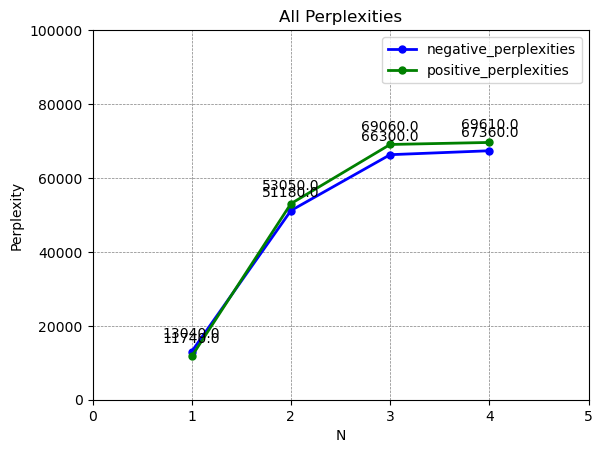

In [43]:
comparetive_line_chart(negative_perplexities ,
                       positive_perplexities , 
                       'All Perplexities' , 
                       ['negative_perplexities' , 'positive_perplexities'] ,
                       'Perplexity' ,
                       100000)

# Model Validation

In [44]:
def classify_val_data(pp_X_val , model1 , model2 , n) :
    
    scores = []
    nX_val = []
    
    for row in pp_X_val :
        nX_val.append(create_ngram([row] , n))
    
    for i in nX_val :
        p = 0
        q = 0
        
        for j in range(len(i)) :
            
            if j == 0 :
                p += model1.logscore(i[j][0])
                q += model2.logscore(i[j][0])
                if n>1 :
                    for t in range(1 , n) :
                        p += model1.logscore(i[j][t] , i[j][ : t])
                        q += model2.logscore(i[j][t] , i[j][ : t])
            else :
                if n==1 :
                    p += model1.logscore(i[j][0])
                    q += model2.logscore(i[j][0])
                else :
                    p += model1.logscore(i[j][n - 1] , i[j][ : n - 1])
                    q += model2.logscore(i[j][n - 1] , i[j][ : n - 1])
        
        if q > p :
            scores.append(0) 
        else :
            scores.append(1)
            
    return scores

In [45]:
# n=1
y_val_1 = np.array(list(classify_val_data(pp_X_val , 
                                          positive_monogram_model ,
                                          negative_monogram_model , 
                                          1)))

print(accuracy(y_val['labels'] , y_val_1))

0.83256


In [46]:
# n=2
y_val_2 = np.array(list(classify_val_data(pp_X_val ,
                                          positive_bigram_model ,
                                          negative_bigram_model , 
                                          2)))

print(accuracy(y_val['labels'] , y_val_2))

0.87704


In [47]:
# n=3
y_val_3 = np.array(list(classify_val_data(pp_X_val ,
                                          positive_trigram_model ,
                                          negative_trigram_model ,
                                          3)))

print(accuracy(y_val['labels'] , y_val_3))

0.856


In [48]:
# n=4
y_val_4 = np.array(list(classify_val_data(pp_X_val ,
                                          positive_quadrigram_model ,
                                          negative_quadrigram_model ,
                                          4)))

print(accuracy(y_val['labels'] , y_val_4))

0.76488


# Classify Test Data

In [49]:
def write_predicted_values(predicted_y_test) :
    
    zero = '0.000000000000000000e+00'
    one = '1.000000000000000000e+00'
    file = open ('y_test.txt' , 'w') 
    
    for i in predicted_y_test :
        if i :
            file.write(one + '\n')  
        else :
            file.write(zero + '\n')
            
    file.close()

In [50]:
predicted_y_test = np.array(list(classify_val_data(pp_X_test ,
                                                   positive_bigram_model ,
                                                   negative_bigram_model ,
                                                   2)))

write_predicted_values(predicted_y_test)

# Some Extra Chart

In [51]:
best_val_accuracy = [0.83 , 0.87 , 0.85 , 0.76]
y_train_accuracy = [0.899 , 0.995 , 0.999 , 1.0]
sw_val_accuracy = [0.84 , 0.86 , 0.69 , 0.57]

### Analyzing the Impact of Stop Words
An important finding from our analysis was that removing stop words negatively impacted our model's performance. This observed decline is potentially attributed to the fact that stop words can carry salient contextual cues — eliminating them may change the intended meaning of certain phrases.

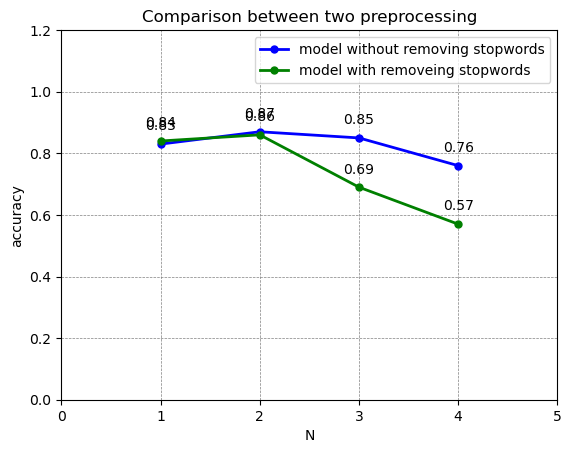

In [52]:
comparetive_line_chart(best_val_accuracy ,
                       sw_val_accuracy ,
                       'Comparison between two preprocessing' ,
                       ['model without removing stopwords' , 'model with removeing stopwords'] ,
                       'accuracy')

### bias variance tradeoff

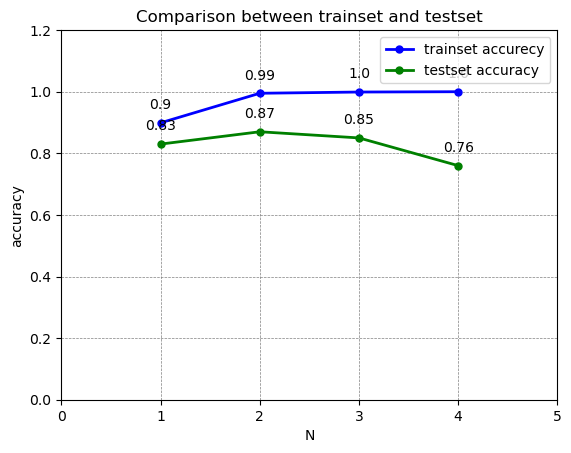

In [53]:
comparetive_line_chart(y_train_accuracy ,
                       best_val_accuracy ,
                       'Comparison between trainset and testset' ,
                       ['trainset accurecy' ,'testset accuracy'] ,
                       'accuracy')

# Conclusion
This project highlights the significance of parameter selection in machine learning models, with the choice of n-gram size critically impacting sentiment analysis results. Moreover, our results serve as a reminder that pre-processing choices, particularly concerning stop words, warrant careful consideration to avoid detrimental effects on model interpretability and performance.

Future work could delve deeper into advanced modeling techniques and explore the implications of nuanced linguistic features beyond n-gram representation for more robust sentiment analysis outcomes.